<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>


<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

<h1>3. Exploratory Data Analysis </h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc
import nltk
nltk.download('stopwords')

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

[nltk_data] Downloading package stopwords to /home/ayush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2> 3.1 Reading data and basic stats </h2>

In [2]:
df = pd.read_csv("train.csv")

print("Number of data points i.e. question pairs:",df.shape[0])

Number of data points i.e. question pairs: 404290


In [3]:
pd.set_option("display.max_columns", 6)
# pd.set_option('max_colwidth', 1000)
pd.set_option('display.max_colwidth', -1)
df.head(50)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone and video games?,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Motorolla DCX3400?,How do I hack Motorola DCX3400 for free internet?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - whether the two questions are duplicates of each other.

<h3> 3.2.1 Distribution of data points among output classes</h3>
- Number of duplicate(smilar) and non-duplicate(non similar) questions

<AxesSubplot:xlabel='is_duplicate'>

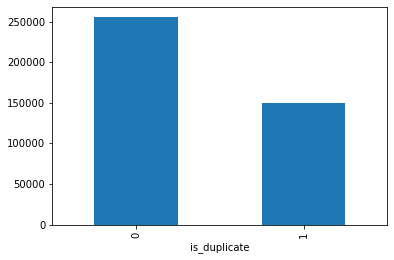

In [5]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [6]:
print('~> Total number of question pairs for training:\n   {}'.format(len(df)))

~> Total number of question pairs for training:
   404290


In [7]:
df['is_duplicate'].value_counts()
print('Question pairs are not Similar: {}%'.format((df['is_duplicate'].value_counts()[0]/df.shape[0])*100))
print('Question pairs are Similar: {}%'.format((df['is_duplicate'].value_counts()[1]/df.shape[0])*100))


Question pairs are not Similar: 63.08021469737069%
Question pairs are Similar: 36.9197853026293%


<h3> 3.2.2 Number of unique questions </h3>

In [8]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())

unique_qs = len(np.unique(qids))
print("counts per question:\n",qids.value_counts()) 
qs_morethan_onetime = np.sum(qids.value_counts() > 1)

print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))
print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

# q_vals=qids.value_counts()

# print(q_vals.values)

counts per question:
 2559      157
30782     120
4044      111
2561      88 
14376     79 
          .. 
416446    1  
416444    1  
416441    1  
416439    1  
537933    1  
Length: 537933, dtype: int64
Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



In [9]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print(qids)

0         1     
1         3     
2         5     
3         7     
4         9     
         ..     
808575    379845
808576    155606
808577    537929
808578    537931
808579    537933
Length: 808580, dtype: int64


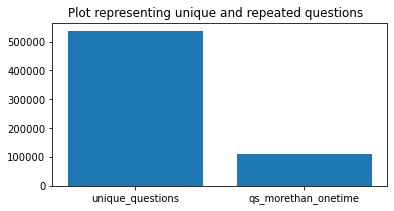

In [10]:
x = ["unique_questions", "qs_morethan_onetime"]
y =  [unique_qs, qs_morethan_onetime]

plt.figure(figsize=(6, 3))
plt.title ("Plot representing unique and repeated questions  ")
plt.bar(x,y)
plt.show()

<h3>3.2.3 Checking for Duplicates </h3>

In [11]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


<h3> 3.2.4 Number of occurrences of each question </h3>

Maximum number of times a single question is repeated: 157



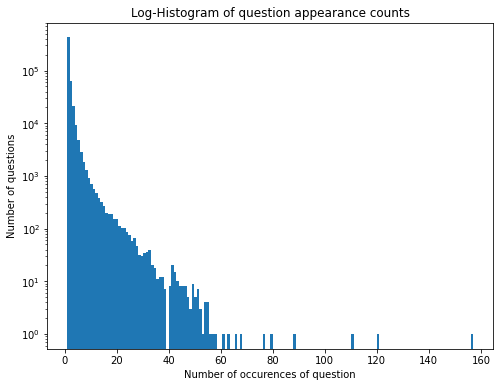

In [12]:
plt.figure(figsize=(8, 6))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 
# q_vals=qids.value_counts()
# plt.hist(q_vals)
# plt.xlabel('freqency')
# plt.ylabel('Unique questions')
# plt.show()

<h3> 3.2.5 Checking for NULL values </h3>

In [13]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(axis=1)]
display (nan_rows)

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English name is most suitable for me considering the pronounciation of my Chinese name?,0


- There are two rows with null values in question2 

In [14]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
display(nan_rows)
#none null values

,id,qid1,qid2,question1,question2,is_duplicate


<h2>3.3 Basic Feature Extraction (before cleaning) </h2>

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [1]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    
    #group the df rows acc to qid's, work on qid's itself, count the no.of qid's for a qid; then transform puts value to every axis value inn 'shape'
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    #.apply works on every given pandas series, which is 'question1' here
    
    
    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)
    
# df['q1_n_words_rough'] = df.groupby('question1')['question1'].transform(lambda row: len(row.split(" ")))

pd.set_option("display.max_columns", 100)
pd.set_option('max_colwidth', 1000)
pd.set_option('display.max_colwidth', -1)
df.head(5)

NameError: name 'os' is not defined

<h3> 3.3.1 Analysis of some of the extracted features </h3>

- Here are some questions have only one single words.

In [16]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 67
Number of Questions with minimum length [question2] : 24


<h4> 3.3.1.1 Feature: word_share </h4>

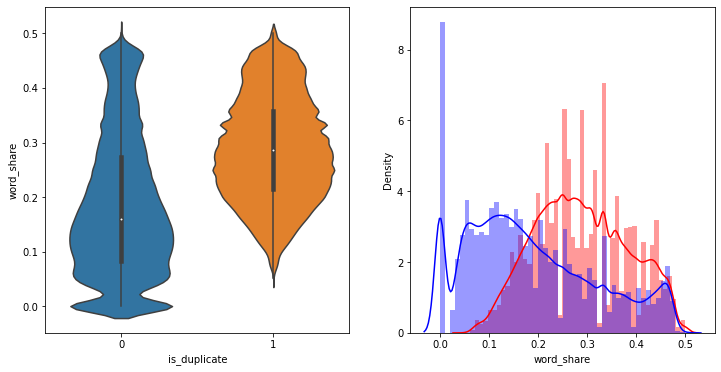

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'green')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,2,2)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])


plt.show()

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

<h4> 3.3.1.2 Feature: word_Common </h4>

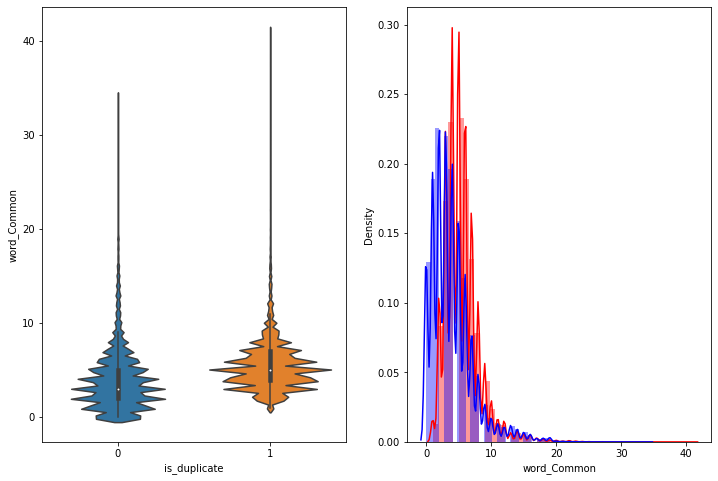

In [18]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

<p> The distributions of the word_Common feature in similar and non-similar questions are highly overlapping </p>

In [19]:
#https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
    df = df.fillna('')
    df.head()
else:
    print("get df_fe_without_preprocessing_train.csv from drive or run the previous notebook")

In [20]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


<h2> 3.4 Preprocessing of Text </h2>

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [4]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

- Function to Compute and get the features : With 2 parameters of Question 1 and Question 2

<h2> 3.5 Advanced Feature Extraction (NLP and Fuzzy Features) </h2>

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if Last word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [22]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [23]:
if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("train.csv")
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


<h3>3.5.1 Analysis of extracted features </h3>

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [24]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s',encoding="utf-8")
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s',encoding="utf-8")

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [25]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt'),encoding="utf-8").read()
textn_w = open(path.join(d, 'train_n.txt'),encoding="utf-8").read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16110763
Total number of words in non duplicate pair questions : 33201102


__ Word Clouds generated from  duplicate pair question's text __

Word Cloud for Duplicate Question pairs


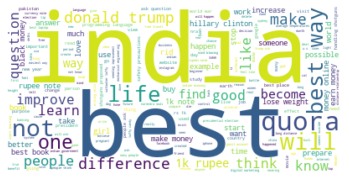

In [26]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

__ Word Clouds generated from non duplicate pair question's text __

Word Cloud for non-Duplicate Question pairs:


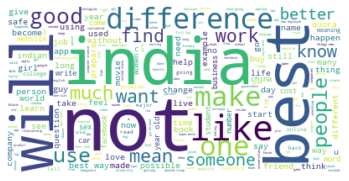

In [27]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h4> 3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] </h4>

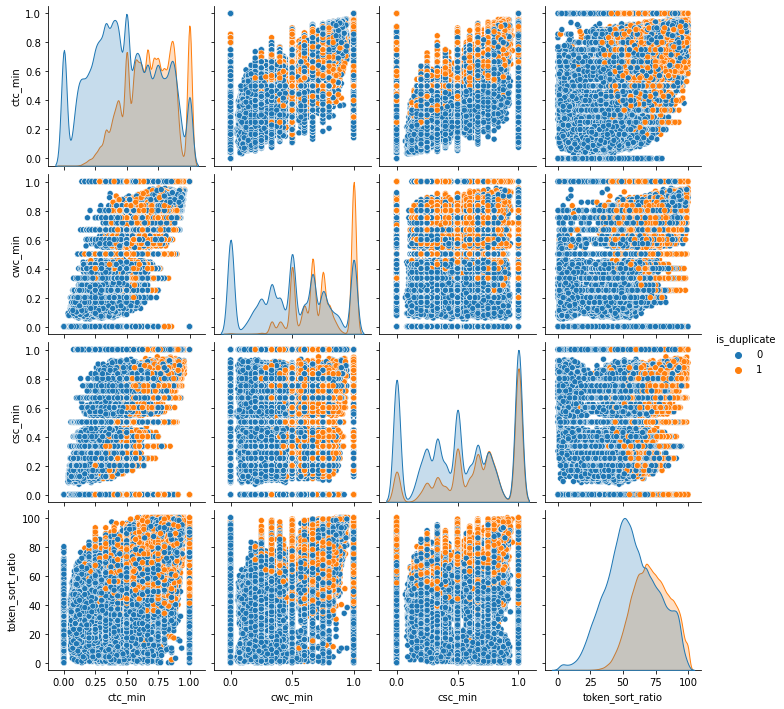

In [28]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

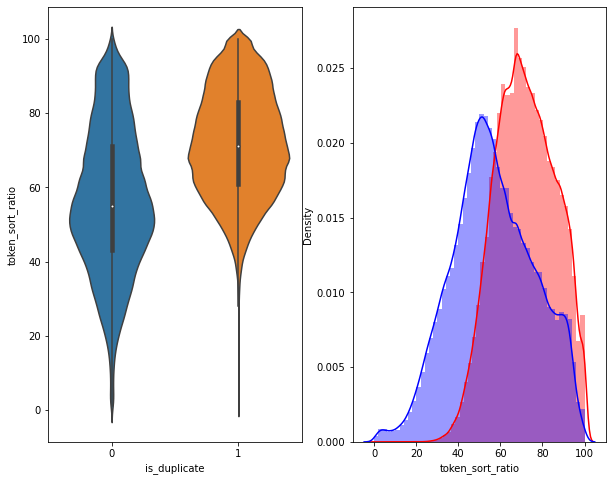

In [29]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

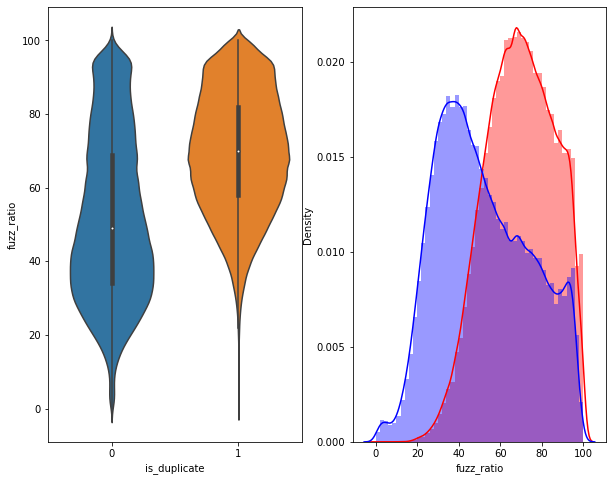

In [30]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

<h3>3.5.2 Visualization </h3>

In [31]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [32]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.073s...
[t-SNE] Computed neighbors for 5000 samples in 0.793s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.443s
[t-SNE] Iteration 50: error = 81.3220596, gradient norm = 0.0456050 (50 iterations in 2.584s)
[t-SNE] Iteration 100: error = 70.6558304, gradient norm = 0.0089307 (50 iterations in 1.905s)
[t-SNE] Iteration 150: error = 68.9428329, gradient norm = 0.0055120 (50 iterations in 1.798s)
[t-SNE] Iteration 200: error = 68.1361694, gradient norm = 0.0043893 (50 iterations in 1.951s)
[t-SNE] Iteration 250: error = 67.6280594, gradient norm = 0.0038229

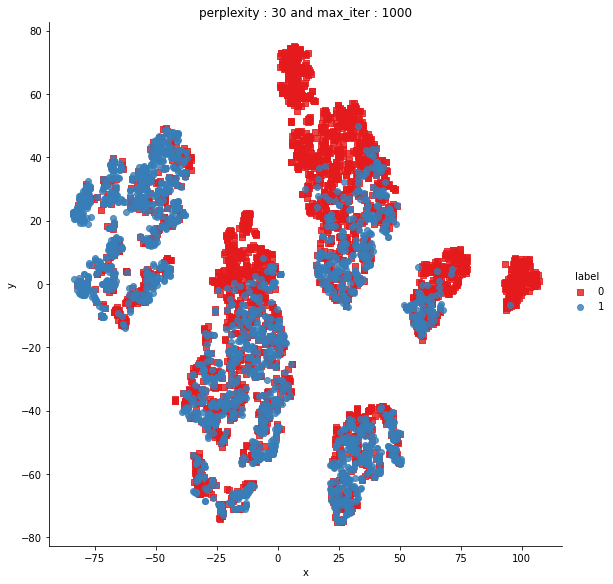

In [33]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [34]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.031s...
[t-SNE] Computed neighbors for 5000 samples in 0.728s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.302s
[t-SNE] Iteration 50: error = 80.5631256, gradient norm = 0.0313357 (50 iterations in 5.329s)
[t-SNE] Iteration 100: error = 69.4188385, gradient norm = 0.0036464 (50 iterations in 3.576s)
[t-SNE] Iteration 150: error = 68.0113144, gradient norm = 0.0017043 (50 iterations in 3.163s)
[t-SNE] Iteration 200: error = 67.4470215, gradient norm = 0.0011665 (50 iterations in 3.107s)
[t-SNE] Iteration 250: error = 67.1339722, gradient norm = 0.0010371

In [35]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

<h2> 3.6 Featurizing text data with tfidf weighted word-vectors </h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

2022-12-06 07:37:02.244919: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 07:37:08.855061: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-06 07:37:08.855130: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-06 07:37:09.713041: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-06 07:37:41.055452: W tensorflow/stream_executor/platform/de

In [3]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [4]:
df.head()
df.shape

(404290, 6)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False,)
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [7]:
word2tfidf

{'00': 10.04915924690928,
 '000': 7.304591037001674,
 '0000': 13.909888957949875,
 '000000': 13.909888957949875,
 '00000000': 13.909888957949875,
 '0000000000': 13.50442384984171,
 '0000001': 13.909888957949875,
 '00000074': 13.909888957949875,
 '0000021210': 13.909888957949875,
 '00001': 13.909888957949875,
 '0001': 13.909888957949875,
 '0002': 13.909888957949875,
 '000INR': 13.909888957949875,
 '000K': 13.909888957949875,
 '000Rs': 12.811276669281765,
 '000USD': 13.909888957949875,
 '000WebHost': 13.909888957949875,
 '000ft': 13.909888957949875,
 '000rs': 13.909888957949875,
 '000s': 13.909888957949875,
 '000webhost': 13.909888957949875,
 '001': 12.811276669281765,
 '0015': 13.909888957949875,
 '0019': 12.99359822607572,
 '002': 13.21674177738993,
 '0021': 13.909888957949875,
 '0035': 13.909888957949875,
 '003SC': 13.909888957949875,
 '005': 13.909888957949875,
 '0051': 13.50442384984171,
 '007': 13.50442384984171,
 '008': 13.50442384984171,
 '008801703772104': 13.909888957949875,
 '

- After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
- here we use a pre-trained GLOVE model which comes free with "Spacy".  https://spacy.io/usage/vectors-similarity
- It is trained on Wikipedia and therefore, it is stronger in terms of word semantics. 

In [9]:
import en_core_web_sm

ModuleNotFoundError: No module named 'en_core_web_sm'

In [9]:
!pip install spacytextblob
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm

  Using cached spacytextblob-4.0.0-py3-none-any.whl (4.5 kB)
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


^C


In [10]:
nlp = spacy.load("en_core_web_sm")

In [12]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
# nlp = en_core_web_sm.load()

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(df['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), 96])
    #print()
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['q1_feats_m'] = list(vecs1)


  0%|                                                                                                                                                                                                            | 0/404290 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (15,384) (96,) (15,384) 

In [36]:
doc1[0].vector.shape

(96,)

In [30]:
dir(doc1)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_context',
 '_get_array_attrs',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set

In [13]:
mean_vec1.shape

(15, 384)

In [40]:
vecs2 = []
for qu2 in tqdm(list(df['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), 96])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
df['q2_feats_m'] = list(vecs2)

100%|█████████████████████████████████████████████████████████████████████████| 404290/404290 [40:43<00:00, 165.48it/s]


In [41]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [42]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3_q1 = pd.DataFrame(df3.q1_feats_m.values.tolist(), index= df3.index)
df3_q2 = pd.DataFrame(df3.q2_feats_m.values.tolist(), index= df3.index)

In [43]:
# dataframe of nlp features
df1.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


In [44]:
# data before preprocessing 
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [45]:
# Questions 1 tfidf weighted word2vec
df3_q1.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,28.505168,-6.668543,27.934619,-35.303677,-13.590169,2.813855,-34.141832,-39.723892,13.908162,7.642761,...,21.425739,-1.578822,-26.098868,14.420271,-43.689805,-52.154671,39.668683,65.215845,3.648807,2.141548
1,80.920736,14.522512,8.747214,-10.627092,-32.863597,42.647875,-49.310863,-4.615758,24.387455,-10.313335,...,9.535705,-9.775651,-67.354446,7.883729,7.294849,-46.185484,-18.570708,47.658454,28.385390,26.411260
2,16.304034,10.466194,-16.121922,-2.034769,-12.671675,-3.325117,-4.964587,-40.802416,19.395482,0.458789,...,36.500579,14.436685,5.828354,36.516149,-31.183511,-33.911765,-0.510468,-18.043430,6.461991,-8.763262
3,25.437092,60.496401,-18.734636,-17.648518,10.607407,34.267028,-7.640634,-19.066555,36.765855,-18.292648,...,-17.919563,17.959610,-11.391149,6.164858,1.401957,10.194025,32.522198,-20.278096,36.932516,-12.494729
4,89.659927,-33.571027,32.713714,-32.018297,38.478466,14.766149,-15.869067,-72.610141,86.239486,-5.095635,...,-43.475572,1.631001,-22.070799,35.274364,34.909424,-44.466848,14.255975,29.884435,32.549382,49.327245


In [46]:
# Questions 2 tfidf weighted word2vec
df3_q2.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,24.072403,-4.327914,16.469961,-28.528379,-8.282737,1.902850,-16.366967,-35.049852,4.878676,1.208403,...,28.148540,1.353424,-11.824829,11.047364,-46.344898,-48.177294,43.835781,34.804440,9.032400,-10.397829
1,70.501072,22.793629,2.456059,7.793115,3.179906,64.958790,-50.533134,-2.921828,32.286931,-11.632442,...,9.847465,-6.033753,-41.089501,14.710465,-2.295958,-41.452774,-8.047283,32.255509,49.435575,7.736098
2,-4.784395,25.616144,32.284418,-17.503802,-28.339841,18.235217,-32.095355,-18.613924,25.132255,38.009239,...,17.234991,-16.020406,11.371594,38.165762,-58.871166,-58.693419,25.354105,-8.443720,18.219843,4.179047
3,8.964527,52.532704,-3.684324,0.089238,-35.289630,10.542750,12.369892,-5.454315,16.958829,9.866997,...,-0.328744,2.499027,13.687267,14.945719,-38.077516,-27.151416,-10.715019,-11.844045,7.744034,-38.738776
4,32.101281,-15.166131,-2.571749,-5.634248,5.786916,20.789494,-6.125809,-17.332545,15.784926,1.939613,...,9.265303,6.862868,-24.873212,18.215863,-8.750956,-22.902639,24.033338,-9.201678,23.656194,0.068456


In [47]:
print("Number of features in nlp dataframe :", df1.shape[1])
print("Number of features in preprocessed dataframe :", df2.shape[1])
print("Number of features in question1 w2v  dataframe :", df3_q1.shape[1])
print("Number of features in question2 w2v  dataframe :", df3_q2.shape[1])
print("Number of features in final dataframe  :", df1.shape[1]+df2.shape[1]+df3_q1.shape[1]+df3_q2.shape[1])

Number of features in nlp dataframe : 17
Number of features in preprocessed dataframe : 12
Number of features in question1 w2v  dataframe : 96
Number of features in question2 w2v  dataframe : 96
Number of features in final dataframe  : 221


In [48]:
# storing the final features to csv file
if not os.path.isfile('final_features.csv'):
    df3_q1['id']=df1['id']
    df3_q2['id']=df1['id']
    df1  = df1.merge(df2, on='id',how='left')
    df2  = df3_q1.merge(df3_q2, on='id',how='left')
    result  = df1.merge(df2, on='id',how='left')
    result.to_csv('final_features.csv')

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [8]:
#Creating db file from csv
if not os.path.isfile('train1.db'):
    disk_engine = create_engine('sqlite:///train1.db')
    start = dt.datetime.now()
    chunksize = 50000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):        
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

In [9]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [10]:
read_db = 'train1.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [11]:
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        data = pd.read_sql_query("""SELECT Count(*) FROM data;""", conn_r)
        conn_r.commit()
        conn_r.close()
data

,Count(*)
0,404291


In [12]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        data = pd.read_sql_query("""SELECT * FROM data LIMIT 50537;""", conn_r)
        
        # for selecting random points
#         data = pd.read_sql_query("SELECT * From data ;", conn_r)
        conn_r.commit()
        conn_r.close()

In [13]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [34]:
data.head()

,index,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,101,99.0,99,0,0.249996875039062,0.249996875039062,0.0,0.0,0.1538449704233044,0.1428561224562681,...,28.31831121444702,14.69862699508667,-20.81955137848854,14.981828033924103,-8.154805123806,-15.946190528571606,19.703359650447965,14.671180039644241,-4.188165992498398,-12.280769474804401
1,102,100.0,100,1,0.7499812504687383,0.4285653062099113,0.8333194446759221,0.4999950000499995,0.7999920000799993,0.4210504155241288,...,3.208608955144882,0.6881560683250427,-11.281788941472769,22.652737587690353,-19.023103296756744,-47.46511346101761,4.778112664818764,4.571769565343857,10.420808553695679,23.130424797534943
2,103,101.0,101,0,0.4999875003124922,0.3999920001599968,0.3333222225925802,0.1999960000799984,0.374995312558593,0.3333296296707814,...,-25.80002450942993,18.285172700881958,-23.56917291879654,-8.733825325965881,-25.600574374198914,-34.80454063415527,21.794719068333507,16.93107980489731,6.6937742829322815,54.496850311756134
3,104,102.0,102,0,0.7999840003199936,0.3999960000399996,0.3999920001599968,0.3333277778703688,0.399997333351111,0.3749976562646483,...,6.453808665275574,-5.609618972986937,-56.51839889958501,-12.201491832733154,-74.07700350508094,-82.48755475878716,-6.282617725431919,19.7746519446373,25.344555139541626,36.54551787674427
4,105,103.0,103,0,0.6666444451851604,0.4999875003124922,0.7499812504687383,0.5999880002399952,0.6249921875976551,0.6249921875976551,...,16.31448757648468,8.924178510904312,-25.245200276374817,-4.110823929309845,28.566798269748688,-27.66272735595703,9.784807026386261,4.999921143054962,16.903162956237793,-5.54603636264801


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50537 entries, 0 to 50536
Columns: 222 entries, index to 95_y
dtypes: float64(1), int64(1), object(220)
memory usage: 85.6+ MB


In [14]:
list(data.columns)

['cwc_min',
 'cwc_max',
 'csc_min',
 'csc_max',
 'ctc_min',
 'ctc_max',
 'last_word_eq',
 'first_word_eq',
 'abs_len_diff',
 'mean_len',
 'token_set_ratio',
 'token_sort_ratio',
 'fuzz_ratio',
 'fuzz_partial_ratio',
 'longest_substr_ratio',
 'freq_qid1',
 'freq_qid2',
 'q1len',
 'q2len',
 'q1_n_words',
 'q2_n_words',
 'word_Common',
 'word_Total',
 'word_share',
 'freq_q1+q2',
 'freq_q1-q2',
 '0_x',
 '1_x',
 '2_x',
 '3_x',
 '4_x',
 '5_x',
 '6_x',
 '7_x',
 '8_x',
 '9_x',
 '10_x',
 '11_x',
 '12_x',
 '13_x',
 '14_x',
 '15_x',
 '16_x',
 '17_x',
 '18_x',
 '19_x',
 '20_x',
 '21_x',
 '22_x',
 '23_x',
 '24_x',
 '25_x',
 '26_x',
 '27_x',
 '28_x',
 '29_x',
 '30_x',
 '31_x',
 '32_x',
 '33_x',
 '34_x',
 '35_x',
 '36_x',
 '37_x',
 '38_x',
 '39_x',
 '40_x',
 '41_x',
 '42_x',
 '43_x',
 '44_x',
 '45_x',
 '46_x',
 '47_x',
 '48_x',
 '49_x',
 '50_x',
 '51_x',
 '52_x',
 '53_x',
 '54_x',
 '55_x',
 '56_x',
 '57_x',
 '58_x',
 '59_x',
 '60_x',
 '61_x',
 '62_x',
 '63_x',
 '64_x',
 '65_x',
 '66_x',
 '67_x',
 '6

In [11]:
list(data.isnull().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [13]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
data = pd.DataFrame(np.array(data.values,dtype=np.float64),columns=cols)

In [14]:
y_true = list(map(int, y_true.values))

## data = BF+ AF+ tf-idf

<h2> 4.3 Random train test split( 70:30) </h2>

In [15]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3,random_state=13)

In [16]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (35375, 218)
Number of data points in test data : (15161, 218)


In [17]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6271660777385158 Class 1:  0.3728339222614841
---------- Distribution of output variable in train data ----------
Class 0:  0.3728645867686828 Class 1:  0.3728645867686828


In [80]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8829759816020347


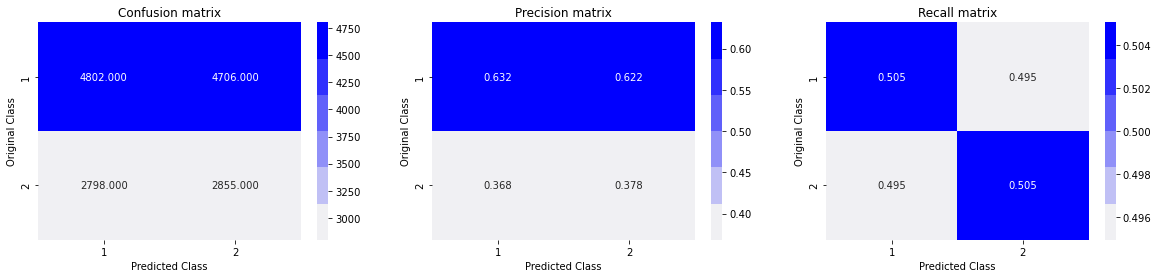

In [19]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

In [29]:
# count = 0
# for i in list(data.isnull().sum()):
#     if i != 0:
#         break
#     count=count+1
# count

218

In [20]:
X_train_new= X_train

In [21]:
X_train_new.isnull().sum()

cwc_min    0
cwc_max    0
csc_min    0
csc_max    0
ctc_min    0
          ..
91_y       0
92_y       0
93_y       0
94_y       0
95_y       0
Length: 218, dtype: int64

In [22]:
# count = 0
# for i in list(X_test.isnull().sum()):
#     if i != 0:
#         break
#     count=count+1
# count

In [23]:
X_test_new= X_test

For values of alpha =  1e-05 The log loss is: 0.4510629339224881
For values of alpha =  0.0001 The log loss is: 0.45359096751972855
For values of alpha =  0.001 The log loss is: 0.44606447380963776
For values of alpha =  0.01 The log loss is: 0.43714342104984494
For values of alpha =  0.1 The log loss is: 0.44914919508574996
For values of alpha =  1 The log loss is: 0.48211548048024044
For values of alpha =  10 The log loss is: 0.5278112392932204


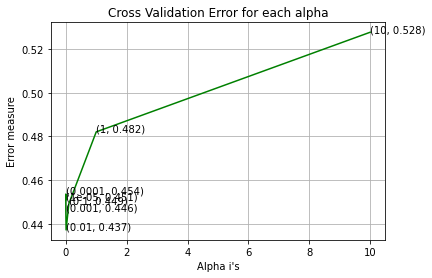

For values of best alpha =  0.01 The train log loss is: 0.42902511282109657
For values of best alpha =  0.01 The test log loss is: 0.43714342104984494
Total number of data points : 15161


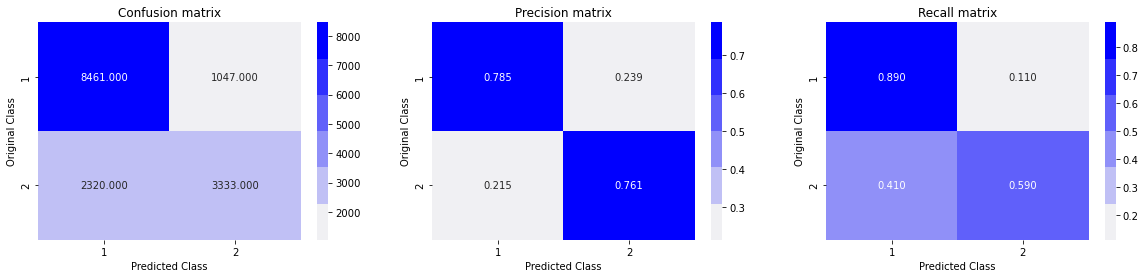

In [24]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_new, y_train)
    predict_y = sig_clf.predict_proba(X_test_new)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_new, y_train)

predict_y = sig_clf.predict_proba(X_train_new)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_new)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

SGD is sensitive to feature scaling, so did scaling and tried.

## SGD done twice, 2nd time after scaling

In [25]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train_new)
X_test_sc = scale.transform(X_test_new)

In [26]:
X_train_sc

array([[ 0.52636036, -0.11083704, -0.507894  , ...,  1.14885633,
        -0.66650294,  0.36238176],
       [ 1.33503364,  0.14991459, -0.21149405, ...,  0.10243014,
        -0.80356663, -0.09343193],
       [-1.89990211, -1.67546416,  1.27077251, ..., -0.58254501,
         0.95396722, -2.13562796],
       ...,
       [-0.28243423, -1.15392179,  1.27053537, ..., -0.14334749,
         0.54040123,  0.88054037],
       [-0.2823938 ,  0.14991459,  0.08499483, ..., -0.62681546,
        -0.89742689,  0.04620537],
       [ 0.52636036,  0.51500129,  0.08499483, ...,  0.46585616,
        -0.96613738, -0.40497354]])

For values of alpha =  1e-05 The log loss is: 0.43924307278375363
For values of alpha =  0.0001 The log loss is: 0.41324939622089346
For values of alpha =  0.001 The log loss is: 0.410962179570058
For values of alpha =  0.01 The log loss is: 0.4198968705717886
For values of alpha =  0.1 The log loss is: 0.45477205074210814
For values of alpha =  1 The log loss is: 0.504191564571563
For values of alpha =  10 The log loss is: 0.5428933740523971


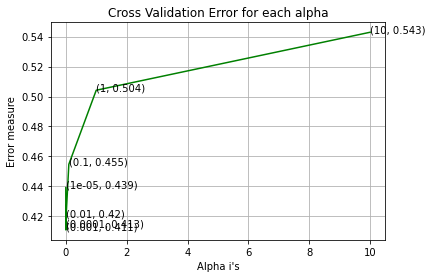

For values of best alpha =  0.001 The train log loss is: 0.40153175598559077
For values of best alpha =  0.001 The test log loss is: 0.410962179570058
Total number of data points : 15161


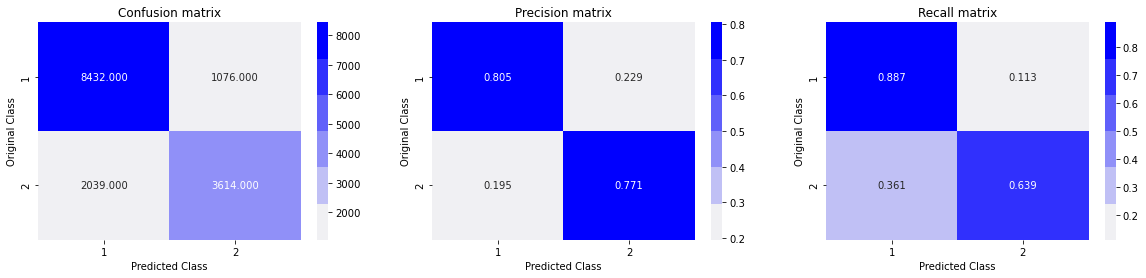

In [27]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

## narrowing alpha to its best value 

For values of alpha =  0.000862 The log loss is: 0.41145893283208723
For values of alpha =  0.001017 The log loss is: 0.40985964864088786
For values of alpha =  0.001226 The log loss is: 0.408980856737692
For values of alpha =  0.001482 The log loss is: 0.40911847108572147
For values of alpha =  0.00212 The log loss is: 0.41022998891748846
For values of alpha =  0.003 The log loss is: 0.41072679333000967
For values of alpha =  0.00314 The log loss is: 0.41092350309363934
For values of alpha =  0.003153 The log loss is: 0.4109418826131182
For values of alpha =  0.003568 The log loss is: 0.4116760726159021
For values of alpha =  0.003988 The log loss is: 0.4125230908495899
For values of alpha =  0.004111 The log loss is: 0.4126753056973272
For values of alpha =  0.005223 The log loss is: 0.4143492749228818
For values of alpha =  0.005941 The log loss is: 0.41518179776198955
For values of alpha =  0.00595 The log loss is: 0.4151920089692912


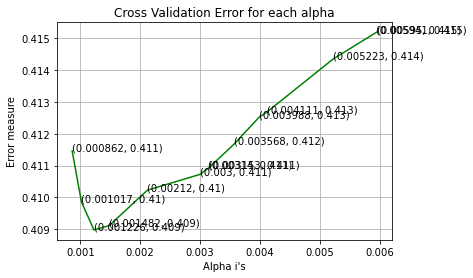

For values of best alpha =  0.001226 The train log loss is: 0.40048280228243793
For values of best alpha =  0.001226 The test log loss is: 0.408980856737692
Total number of data points : 15161


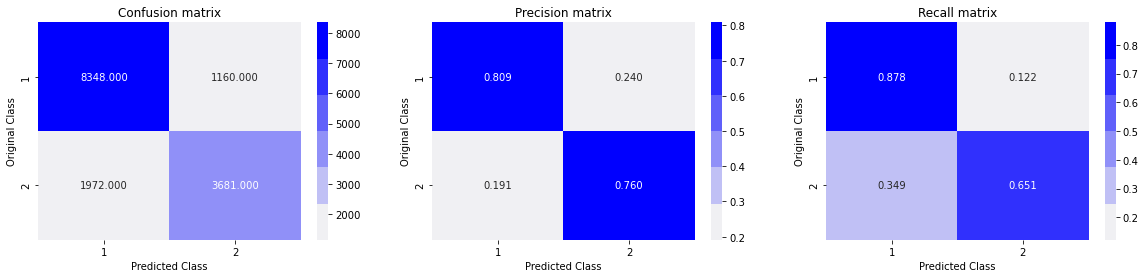

In [28]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------
np.random.seed(45)
alpha = np.random.uniform(0.0006,0.006,14)
alpha = np.round(alpha,6)
alpha.sort()
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.43992622942038173
For values of alpha =  0.0001 The log loss is: 0.41423944824779
For values of alpha =  0.001 The log loss is: 0.41392523317291025
For values of alpha =  0.01 The log loss is: 0.4245390010334757
For values of alpha =  0.1 The log loss is: 0.5110817023339783
For values of alpha =  1 The log loss is: 0.6604626809630104
For values of alpha =  10 The log loss is: 0.6604626809630108


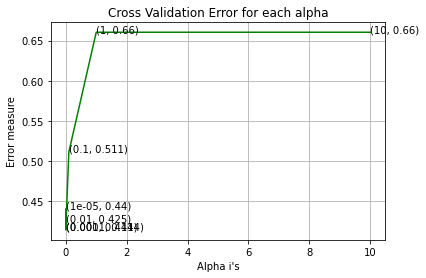

For values of best alpha =  0.001 The train log loss is: 0.4068222366434466
For values of best alpha =  0.001 The test log loss is: 0.41392523317291025
Total number of data points : 15161


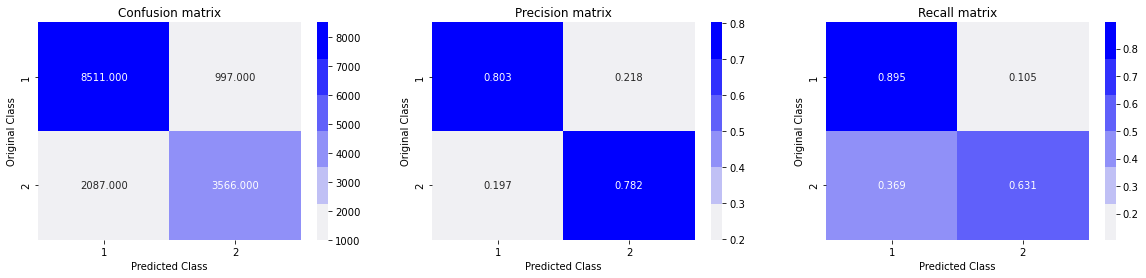

In [29]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y,eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.4416906509816482
For values of alpha =  0.0001 The log loss is: 0.4219295116431928
For values of alpha =  0.001 The log loss is: 0.41131428083925975
For values of alpha =  0.01 The log loss is: 0.41553916479716235
For values of alpha =  0.1 The log loss is: 0.4437403003254241
For values of alpha =  1 The log loss is: 0.4843755318326784
For values of alpha =  10 The log loss is: 0.5372769685757435


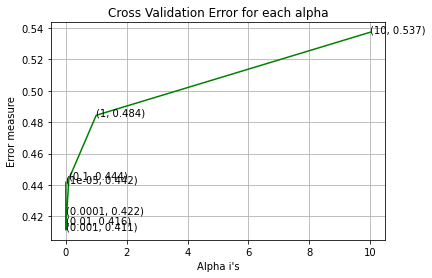

For values of best alpha =  0.001 The train log loss is: 0.4033639903347287
For values of best alpha =  0.001 The test log loss is: 0.41131428083925975
Total number of data points : 15161


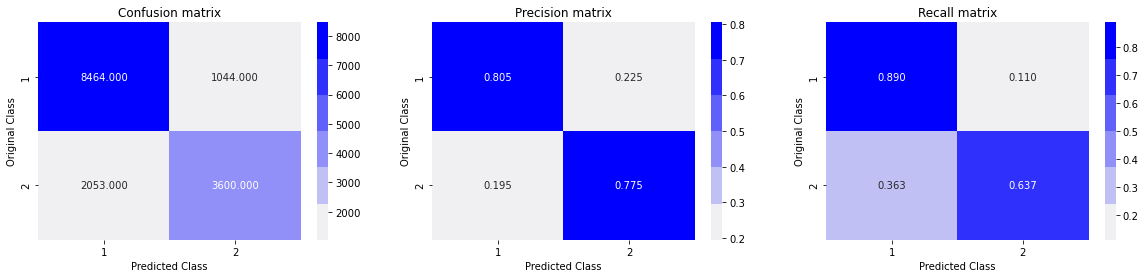

In [36]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y,eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  0.00517 The log loss is: 0.4121298577321993
For values of alpha =  0.00529 The log loss is: 0.4119669914426511
For values of alpha =  0.00721 The log loss is: 0.4140750059064587
For values of alpha =  0.00981 The log loss is: 0.415369871551787
For values of alpha =  0.01228 The log loss is: 0.41704660457789794
For values of alpha =  0.01327 The log loss is: 0.41766166786694725
For values of alpha =  0.01351 The log loss is: 0.4181178553285492
For values of alpha =  0.01425 The log loss is: 0.4182020796988425
For values of alpha =  0.01452 The log loss is: 0.418698634569372
For values of alpha =  0.01757 The log loss is: 0.4210899381216297
For values of alpha =  0.0183 The log loss is: 0.4213587617926108
For values of alpha =  0.01839 The log loss is: 0.4214096894210021
For values of alpha =  0.02118 The log loss is: 0.4227949747757232
For values of alpha =  0.02636 The log loss is: 0.42567017426832865


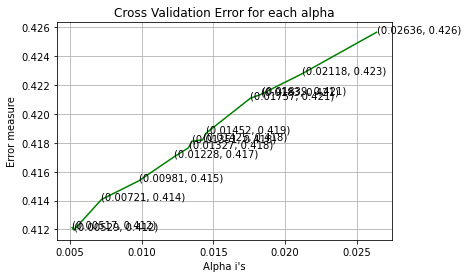

For values of best alpha =  0.00529 The train log loss is: 0.4040987733468576
For values of best alpha =  0.00529 The test log loss is: 0.4119669914426511
Total number of data points : 15161


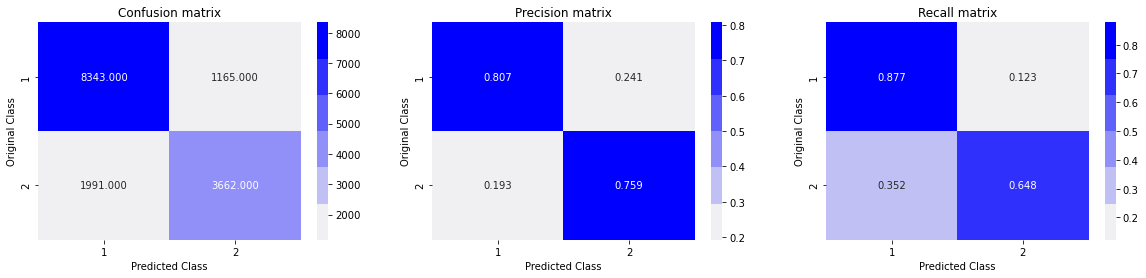

In [37]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

np.random.seed(25)
alpha = np.random.uniform(0.002,0.03,14)
alpha = np.round(alpha,5)
alpha.sort()
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y,eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 Random Forest </h2>

In [38]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [39]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = RFC(n_estimators=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators')
plt.ylabel('Log Loss')

SyntaxError: invalid syntax (4049551330.py, line 16)

Depth =  5 Train Log Loss  0.44835892588063175 Test Log Loss  0.45414373488927146
Depth =  10 Train Log Loss  0.3426435962363705 Test Log Loss  0.4016627208876605
Depth =  12 Train Log Loss  0.29562891245751083 Test Log Loss  0.3955100715744968
Depth =  15 Train Log Loss  0.22334727311090619 Test Log Loss  0.38870456246735163
Depth =  20 Train Log Loss  0.14523123330122303 Test Log Loss  0.3861750548390991
Depth =  25 Train Log Loss  0.11970201704986094 Test Log Loss  0.38828144673529774
Depth =  50 Train Log Loss  0.11343566028405572 Test Log Loss  0.38739215802174126


Text(0, 0.5, 'Log Loss')

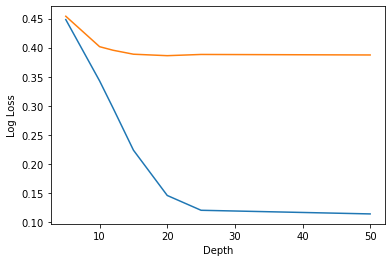

In [40]:
Depth = [5,10,12,15,20,25,50]
test_scores = []
train_scores = []
for i in Depth:
    clf = RFC(n_estimators=100,max_depth=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('Depth = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(Depth,train_scores,label='Train Log Loss')
plt.plot(Depth,test_scores,label='Test Log Loss')
plt.xlabel('Depth') 
plt.ylabel('Log Loss')

estimators =  100 Train Log Loss  0.3222788697308456 Test Log Loss  0.4008198373973135
estimators =  150 Train Log Loss  0.3208096188602424 Test Log Loss  0.39941504615460766
estimators =  200 Train Log Loss  0.3190601845708054 Test Log Loss  0.3975754207420303
estimators =  300 Train Log Loss  0.31919467664277457 Test Log Loss  0.39797331697239025
estimators =  400 Train Log Loss  0.319231723661925 Test Log Loss  0.39792185205420744
estimators =  600 Train Log Loss  0.3202552528705585 Test Log Loss  0.3987757525437094
estimators =  800 Train Log Loss  0.3200121861891313 Test Log Loss  0.3983536170667535


Text(0, 0.5, 'Log Loss')

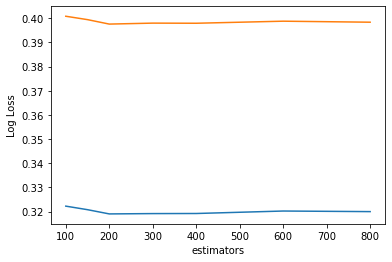

In [41]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = RFC(n_estimators=i,max_depth=11,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators') 
plt.ylabel('Log Loss')

<h2> 4.7 XGBoost </h2>

In [13]:
import xgboost as xgb

estimators =  100 Train Log Loss  0.3510043375709706 Test Log Loss  0.36527832753636624
estimators =  150 Train Log Loss  0.3354056512686249 Test Log Loss  0.35783427646979904
estimators =  200 Train Log Loss  0.32348382360482786 Test Log Loss  0.3533289459926759
estimators =  300 Train Log Loss  0.3052515228212184 Test Log Loss  0.3495412528723249
estimators =  400 Train Log Loss  0.2905771990926309 Test Log Loss  0.3477862777548384
estimators =  600 Train Log Loss  0.26568685745237647 Test Log Loss  0.3456112058656926
estimators =  800 Train Log Loss  0.24333095710990876 Test Log Loss  0.3453726640601875


Text(0, 0.5, 'Log Loss')

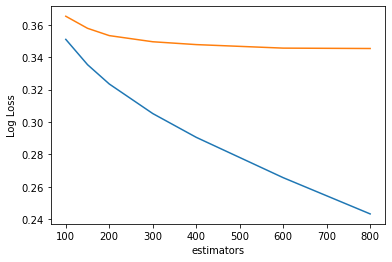

In [45]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators')
plt.ylabel('Log Loss')

Learning Rate =  0.05 Train Log Loss  0.3297185594366317 Test Log Loss  0.3556675534109016
Learning Rate =  0.1 Train Log Loss  0.29764166848400675 Test Log Loss  0.34870155496318894
Learning Rate =  0.15 Train Log Loss  0.2738095433039648 Test Log Loss  0.34807742438412065
Learning Rate =  0.2 Train Log Loss  0.2532075370392235 Test Log Loss  0.34791932089970623
Learning Rate =  0.25 Train Log Loss  0.23481347480577058 Test Log Loss  0.35086041882301
Learning Rate =  0.3 Train Log Loss  0.21935535525470343 Test Log Loss  0.35327576305493674


Text(0, 0.5, 'Log Loss')

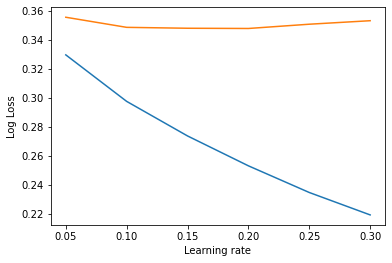

In [46]:
test_scores = []
train_scores = []
etas = [0.05,0.1,0.15,0.2,0.25,0.3]
for i in etas:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=i,n_estimators=350,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('Learning Rate = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(etas,train_scores,label='Train Log Loss')
plt.plot(etas,test_scores,label='Test Log Loss')
plt.xlabel('Learning rate')
plt.ylabel('Log Loss')

reg_alpha =  0.5 Train Log Loss  0.12953520844931884 Test Log Loss  0.4107142842537183
reg_alpha =  1 Train Log Loss  0.1293396176416338 Test Log Loss  0.4125286454565861
reg_alpha =  5 Train Log Loss  0.14012848330602765 Test Log Loss  0.3935988921079462
reg_alpha =  10 Train Log Loss  0.15635278661846183 Test Log Loss  0.3847814920404467
reg_alpha =  50 Train Log Loss  0.3037965356407514 Test Log Loss  0.3577076528286767
reg_alpha =  100 Train Log Loss  0.3530445251874494 Test Log Loss  0.36879676554701146
reg_alpha =  150 Train Log Loss  0.3705042531198621 Test Log Loss  0.38011741986730807


Text(0, 0.5, 'Log Loss')

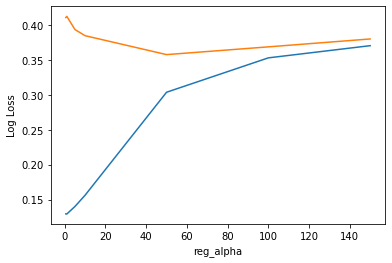

In [47]:
test_scores = []
train_scores = []
alpha = [0.5,1,5,10,50,100,150]
for i in alpha:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.65,n_estimators=370,reg_alpha=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('reg_alpha = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(alpha,train_scores,label='Train Log Loss')
plt.plot(alpha,test_scores,label='Test Log Loss')
plt.xlabel('reg_alpha')
plt.ylabel('Log Loss')

The test log loss is: 0.37127246537132197


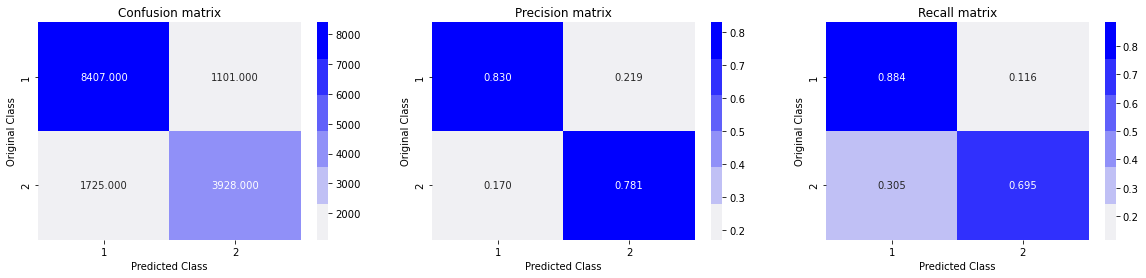

In [48]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.02,n_estimators=400,n_jobs=-1)
clf.fit(X_train,y_train)
predict_y = clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

Sampled data and did further hyperparam truning because of time constraints. random search for 15 models took around one day and then my system is not responding.

In [6]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [7]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [8]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
data = pd.DataFrame(np.array(data.values,dtype=np.float64),columns=cols)

In [102]:
y_true = list(map(int, y_true.values))

AttributeError: 'list' object has no attribute 'values'

In [105]:
len(y_true)
print(data.shape)

(100000, 218)


In [10]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3,random_state=13)

In [11]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 218)
Number of data points in test data : (30000, 218)


estimators =  100 Train Log Loss  0.3569795292907066 Test Log Loss  0.36480200133552815
estimators =  150 Train Log Loss  0.34362562772712096 Test Log Loss  0.3548933768221924
estimators =  200 Train Log Loss  0.3343646071190226 Test Log Loss  0.34900488166460636
estimators =  300 Train Log Loss  0.3213156096618296 Test Log Loss  0.3432115715358122
estimators =  400 Train Log Loss  0.3114521066987345 Test Log Loss  0.34052358986985637
estimators =  600 Train Log Loss  0.294240459245611 Test Log Loss  0.3377063904152743
estimators =  800 Train Log Loss  0.2791618728438352 Test Log Loss  0.3357056661299078


Text(0, 0.5, 'Log Loss')

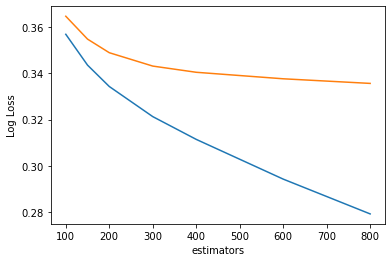

In [14]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators')
plt.ylabel('Log Loss')

Learning Rate =  0.05 Train Log Loss  0.3499744633887456 Test Log Loss  0.3595685860892816
Learning Rate =  0.1 Train Log Loss  0.32734312341488775 Test Log Loss  0.3455341173583472
Learning Rate =  0.15 Train Log Loss  0.3136472815824934 Test Log Loss  0.34191917791571175
Learning Rate =  0.2 Train Log Loss  0.30248911509315407 Test Log Loss  0.33976788434167043
Learning Rate =  0.25 Train Log Loss  0.29150055592148544 Test Log Loss  0.3393752758077057
Learning Rate =  0.3 Train Log Loss  0.2844356590504784 Test Log Loss  0.3408253705617314


Text(0, 0.5, 'Log Loss')

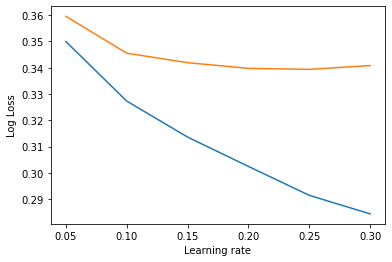

In [15]:
test_scores = []
train_scores = []
etas = [0.05,0.1,0.15,0.2,0.25,0.3]
for i in etas:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=i,n_estimators=250,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('Learning Rate = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(etas,train_scores,label='Train Log Loss')
plt.plot(etas,test_scores,label='Test Log Loss')
plt.xlabel('Learning rate')
plt.ylabel('Log Loss')

reg_alpha =  0.5 Train Log Loss  0.21310156415769954 Test Log Loss  0.41001198856755056
reg_alpha =  1 Train Log Loss  0.2150832826658877 Test Log Loss  0.4089335748287322
reg_alpha =  5 Train Log Loss  0.2167897885185028 Test Log Loss  0.3927472018728266
reg_alpha =  10 Train Log Loss  0.22306564183349437 Test Log Loss  0.38751816346957013
reg_alpha =  50 Train Log Loss  0.26746363985374283 Test Log Loss  0.35802325565106047
reg_alpha =  100 Train Log Loss  0.33258422352402994 Test Log Loss  0.35548761745163987
reg_alpha =  150 Train Log Loss  0.351181154475875 Test Log Loss  0.36415178827529116


Text(0, 0.5, 'Log Loss')

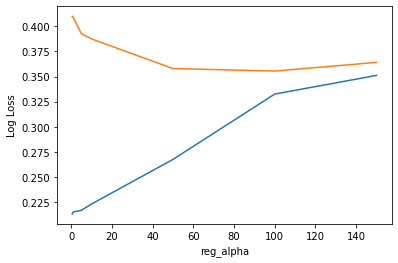

In [16]:
test_scores = []
train_scores = []
alpha = [0.5,1,5,10,50,100,150]
for i in alpha:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.95,n_estimators=250,reg_alpha=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('reg_alpha = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(alpha,train_scores,label='Train Log Loss')
plt.plot(alpha,test_scores,label='Test Log Loss')
plt.xlabel('reg_alpha')
plt.ylabel('Log Loss')

In [38]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterSampler
import pickle
param_dist ={"max_depth": sp_randint(2,5),
              "learning_rate":uniform(0,0.2),
              "n_estimators":sp_randint(200,350),
              "min_child_weight": sp_randint(2, 8),
              "gamma": uniform(0,4),
              "subsample":uniform(0.7,0.3),
              "colsample_bytree": uniform(0.7,0.3),
              "reg_alpha":uniform(100,300),
              "reg_lambda":uniform(100,300)}

model_rs_xgb = RandomizedSearchCV(xgb.XGBClassifier(n_jobs=-1,random_state=25), param_distributions=param_dist,
                                   n_iter=30,scoring='neg_log_loss',cv=5,n_jobs=-1)
model_rs_xgb.fit(X_train,y_train)
pickle.dump(model_rs_xgb,open('model_rs_xgb.p','wb'))

NameError: name 'pickle' is not defined

In [40]:
# import pickle

In [41]:
# pickle.dump(model_rs_xgb,open('model_rs_xgb.p','wb'))

In [43]:
dir(model_rs_xgb)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_f

In [70]:
model_rs_xgb.cv_results_

{'mean_fit_time': array([609.97997108, 538.45143862, 360.02142649, 488.3760087 ,
        432.85663319, 800.18830857, 339.17070007, 622.63742595,
        337.29833307, 318.29536514, 585.90928836, 481.77835937,
        460.25643473, 334.5740232 , 514.3713223 , 567.0107883 ,
        324.8996717 , 377.6392375 , 523.88013821, 555.93754606,
        704.46722984, 417.15796547, 434.53271418, 427.86571431,
        349.72490587, 523.06751428, 551.70643134, 401.66105628,
        253.32441506, 367.48387718]),
 'std_fit_time': array([ 3.47005403,  5.95244313,  3.20982905,  8.23647273, 10.98460425,
         3.25372401,  3.22602797,  3.36793088,  4.1515662 ,  5.90485212,
         5.86688869,  7.67522094,  6.57989284,  0.87457439, 10.70536019,
        10.01981854,  3.62397604,  5.72026552,  3.84690197,  3.9960477 ,
         8.41957249,  6.17189463,  5.59655006,  5.02932452,  4.63181708,
         3.92228618,  2.46417123,  1.37159036,  7.64915074, 27.73367619]),
 'mean_score_time': array([0.57421193, 0.

In [66]:
for i in model_rs_xgb.cv_results_['params']:
    dict_score = []
    dict_score.append(i['n_estimators'])
    dict_score.append(i['max_depth'])
    dict_score.append(i['subsample'])
    dict_score.append(i['min_child_weight'])
    dict_score.append(i['learning_rate'])
    dict_score.append(i['reg_alpha'])
    dict_score.append(i['reg_lambda'])
    dict_score.append(i['gamma'])
    dict_score.append(i['colsample_bytree'])


In [76]:
dict_scores = []
idx = 0
# for i in 
for i in model_rs_xgb.cv_results_['params']:
    dict_score = []
    dict_score.append(i['n_estimators'])
    dict_score.append(i['max_depth'])
    dict_score.append(i['subsample'])
    dict_score.append(i['min_child_weight'])
    dict_score.append(i['learning_rate'])
    dict_score.append(i['reg_alpha'])
    dict_score.append(i['reg_lambda'])
    dict_score.append(i['gamma'])
    dict_score.append(i['colsample_bytree'])
#     dict_score.append(-i[1])
#     dict_score.append((np.abs(i[2]).std()))
#     dict_score.append(-model_rs_xgb.cv_results_['mean_train_score'][idx])
    dict_scores.append(dict_score)
#     idx = idx + 1
# print(len(dict_scores))
ind = 0
for i in model_rs_xgb.cv_results_['mean_test_score']:
    dict_scores[ind].append(-i)
    ind = ind + 1
ind = 0
for i in model_rs_xgb.cv_results_['std_test_score']:
#     i.append(-i[1])
    dict_scores[ind].append(i)
    ind = ind + 1

scores_df = pd.DataFrame(dict_scores,columns=['n_estimators','depth','subsample','min_child_weight',
                                               'learning_rate','reg_alpha','reg_lambda','gamma',
                                               'colsample_bytree','Test_score',
                                               'Test_std'])

In [77]:
scores_df.sort_values('Test_score').head(10)

,n_estimators,depth,subsample,min_child_weight,learning_rate,reg_alpha,reg_lambda,gamma,colsample_bytree,Test_score,Test_std
1,318,3,0.921119,4,0.163707,145.828331,169.684231,3.180521,0.780236,0.362779,0.005133
15,290,4,0.877569,7,0.159895,173.454513,330.605467,1.884004,0.848551,0.364664,0.005285
12,270,4,0.730582,3,0.192901,165.348720,101.252213,2.254088,0.848792,0.364787,0.004898
10,254,3,0.880609,7,0.142224,150.837398,237.133685,3.174018,0.992791,0.365726,0.004839
11,269,3,0.865751,2,0.171955,164.353264,170.860583,0.628447,0.894012,0.365831,0.005064
23,271,2,0.890217,4,0.188854,125.050631,316.860133,1.016569,0.922331,0.368726,0.004643
20,242,4,0.834837,3,0.105168,178.941167,264.186894,2.986868,0.993926,0.368846,0.004836
7,259,3,0.959718,7,0.095048,175.810745,212.251269,3.390985,0.958606,0.371073,0.004814
26,210,4,0.967785,3,0.039440,157.745971,113.987317,1.939132,0.703748,0.379183,0.004699
24,262,2,0.984610,6,0.099411,181.874616,267.990474,0.082893,0.708696,0.383105,0.004290


The test log loss is: 0.3556712595642622


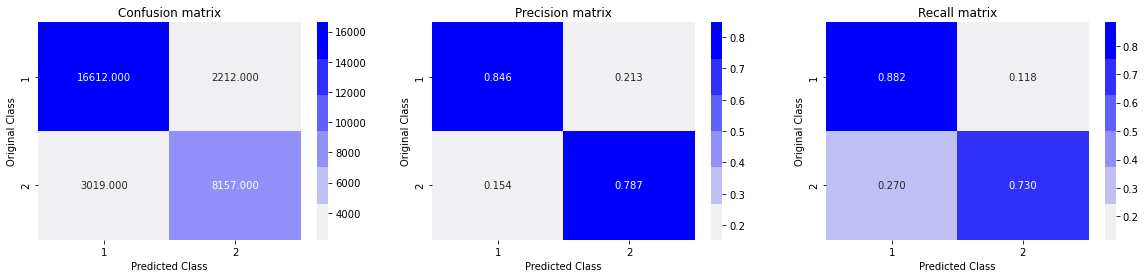

In [81]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=4,learning_rate=0.163707,n_estimators=318,
                        min_child_weight=4,subsample=0.921119,
                        reg_alpha=145.828331,reg_lambda=169.684231,
                        colsample_bytree=0.780236,gamma=3.180521,n_jobs=-1)
clf.fit(X_train,y_train)
predict_y = clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

## With tuned(user-defined) Tf-Idf features, again for BF+AF+tfidf

In [82]:
data.columns[0:26]

Index(['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

In [10]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

NameError: name 'os' is not defined

In [84]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = dfnlp[['id','question1','question2']]
duplicate = dfnlp.is_duplicate

In [85]:
df1.columns #advanced features only

Index(['id', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [86]:
df2.columns #basic features only

Index(['id', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words',
       'q2_n_words', 'word_Common', 'word_Total', 'word_share', 'freq_q1+q2',
       'freq_q1-q2'],
      dtype='object')

In [87]:
df3.columns  

Index(['id', 'question1', 'question2'], dtype='object')

so for Tf-Idf Features i am combining question1 and question2, then getting Tf-Idf for for Train and transforming test.

In [88]:
df3 = df3.fillna(' ')
df4 = pd.DataFrame()
df4['Text'] = df3.question1 + ' ' + df3.question2
df4['id'] = df3.id

#### Combining question1 and question2, then getting Tf-Idf 

In [89]:
df2['id']=df1['id']
df4['id']=df1['id']
df5  = df1.merge(df2, on='id',how='left')
final  = df5.merge(df4, on='id',how='left')

In [90]:
final.columns

Index(['id', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2', 'Text'],
      dtype='object')

In [91]:
final = final.drop('id',axis=1)

In [97]:
print(final.shape)
print(duplicate.shape)
print(len(y_true))

(404290, 27)
(404290,)
100000


In [108]:
X_train_tf,X_test_tf, y_train_tf, y_test_tf = train_test_split(final,duplicate, stratify=duplicate, test_size=0.3,random_state=13)

In [109]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,3),max_features=200000,min_df=0.000032)
train_tfidf = tfidf_vect.fit_transform(X_train_tf.Text)
test_tfidf = tfidf_vect.transform(X_test_tf.Text)
print('No of Tfidf features',len(tfidf_vect.get_feature_names()))

No of Tfidf features 122967


In [110]:
X_train_tf = X_train_tf.drop('Text',axis=1)
X_test_tf = X_test_tf.drop('Text',axis=1)

In [111]:
from scipy.sparse import hstack
X_train1 = hstack((X_train_tf.values,train_tfidf))
X_test1 = hstack((X_test_tf.values,test_tfidf))

In [112]:
X_train1

<283003x122993 sparse matrix of type '<class 'numpy.float64'>'
	with 16070821 stored elements in COOrdinate format>

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler(with_mean=False)
X_train_sc = scale.fit_transform(X_train1)
X_test_sc = scale.transform(X_test1)

In [119]:
X_train_sc.shape

(283003, 122993)

In [120]:
y_train.shape

AttributeError: 'list' object has no attribute 'shape'

For values of alpha =  1e-05 The log loss is: 0.45151520783489607
For values of alpha =  0.0001 The log loss is: 0.45088943868800907
For values of alpha =  0.001 The log loss is: 0.44109033755895594
For values of alpha =  0.01 The log loss is: 0.4106783898150106
For values of alpha =  0.1 The log loss is: 0.38377483330501283
For values of alpha =  1 The log loss is: 0.4024176317895784
For values of alpha =  10 The log loss is: 0.46140371841107247


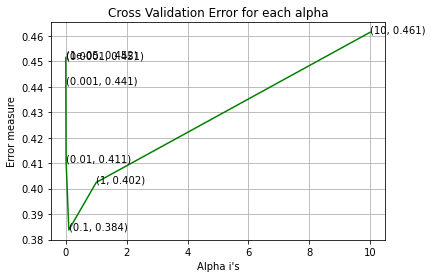

For values of best alpha =  0.1 The train log loss is: 0.2576562744296087
For values of best alpha =  0.1 The test log loss is: 0.38377483330501283
Total number of data points : 121287


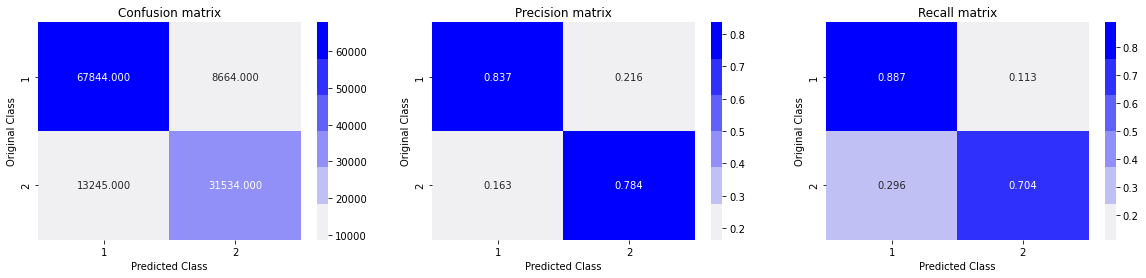

In [123]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train_tf)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test_tf, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tf, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train_tf)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tf, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tf, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tf, predicted_y)

For values of alpha =  0.0667 The log loss is: 0.3859354851508552
For values of alpha =  0.1721 The log loss is: 0.38317887218973085
For values of alpha =  0.1916 The log loss is: 0.3834364938633996
For values of alpha =  0.2244 The log loss is: 0.38399052031767067
For values of alpha =  0.2413 The log loss is: 0.38433679908317736
For values of alpha =  0.2615 The log loss is: 0.38478826076363004
For values of alpha =  0.2635 The log loss is: 0.38483492667090585
For values of alpha =  0.2711 The log loss is: 0.3849886639136253
For values of alpha =  0.4074 The log loss is: 0.38850568334555174
For values of alpha =  0.4228 The log loss is: 0.38895565835192164
For values of alpha =  0.4497 The log loss is: 0.3897193975044655
For values of alpha =  0.4546 The log loss is: 0.38984643593716767
For values of alpha =  0.4665 The log loss is: 0.39016610322713163
For values of alpha =  0.4924 The log loss is: 0.39085759433633527


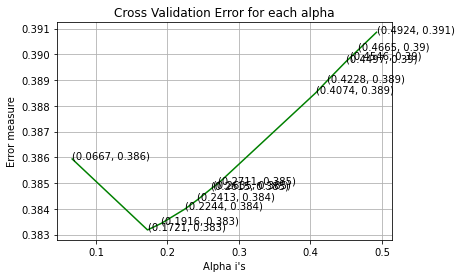

For values of best alpha =  0.1721 The train log loss is: 0.2687663123565792
For values of best alpha =  0.1721 The test log loss is: 0.38317887218973085
Total number of data points : 121287


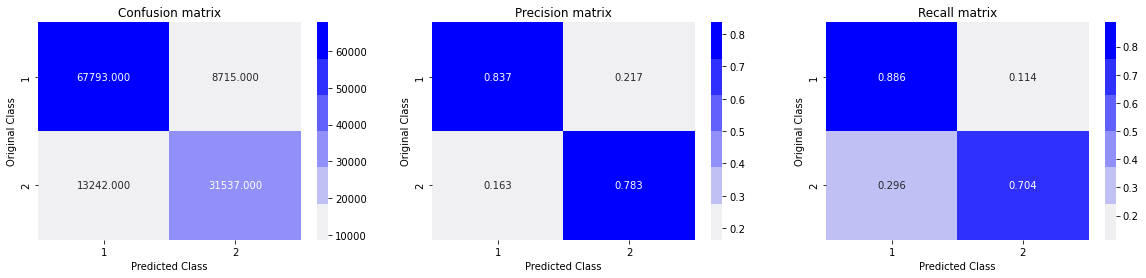

In [125]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------
alpha = np.random.uniform(0.05,0.5,14)
alpha = np.round(alpha,4)
alpha.sort()
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train_tf)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test_tf, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tf, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train_tf)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tf, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tf, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tf, predicted_y)

it was giving some good scores but it seems to be some overfitting in this.  
i think it may be because of feature scaling for all the data including tfidf values so i tried without feature scaling

For values of alpha =  1e-05 The log loss is: 0.3837162621621613
For values of alpha =  0.0001 The log loss is: 0.39027126713311927
For values of alpha =  0.001 The log loss is: 0.431702826445728
For values of alpha =  0.01 The log loss is: 0.4486762199926703
For values of alpha =  0.1 The log loss is: 0.4629586017479453
For values of alpha =  1 The log loss is: 0.49472070361833315
For values of alpha =  10 The log loss is: 0.5436036430614469


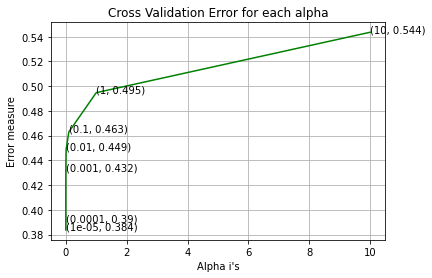

For values of best alpha =  1e-05 The train log loss is: 0.3792409884559357
For values of best alpha =  1e-05 The test log loss is: 0.3837162621621613
Total number of data points : 121287


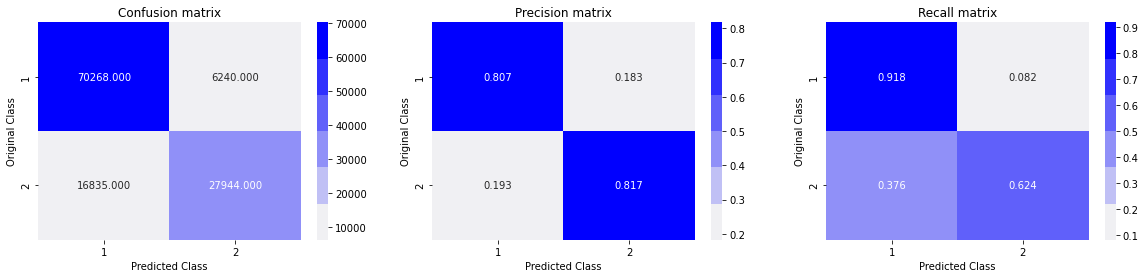

In [128]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train1, y_train_tf)
    predict_y = sig_clf.predict_proba(X_test1)
    log_error_array.append(log_loss(y_test_tf, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tf, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train1, y_train_tf)

predict_y = sig_clf.predict_proba(X_train1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tf, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tf, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tf, predicted_y)

i decresed overfittig but bias increased.
Tought like i will scale features otherthan Tf-Idf and Tf-Idf was already coming with l2 normalization. so tried with this format below

In [129]:
scale = StandardScaler()
X_train_some = scale.fit_transform(X_train_tf)
X_test_some = scale.transform(X_test_tf)

In [130]:
from scipy.sparse import hstack
X_train2 = hstack((X_train_some,train_tfidf))
X_test2 = hstack((X_test_some,test_tfidf))

For values of alpha =  1e-05 The log loss is: 0.35425591529893097
For values of alpha =  0.0001 The log loss is: 0.3839191582562642
For values of alpha =  0.001 The log loss is: 0.4040675343150101
For values of alpha =  0.01 The log loss is: 0.42270942915726684
For values of alpha =  0.1 The log loss is: 0.4595916998635523
For values of alpha =  1 The log loss is: 0.5086525717995343
For values of alpha =  10 The log loss is: 0.5343811797530775


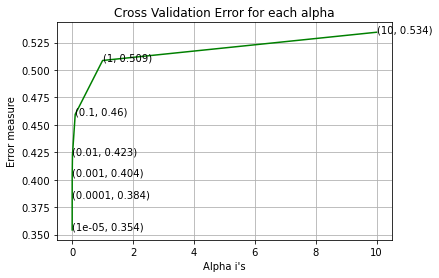

For values of best alpha =  1e-05 The train log loss is: 0.3342368811839987
For values of best alpha =  1e-05 The test log loss is: 0.35425591529893097
Total number of data points : 121287


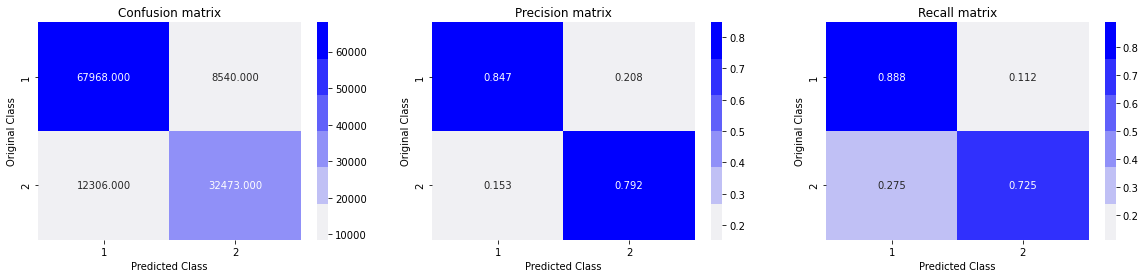

In [131]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train2, y_train_tf)
    predict_y = sig_clf.predict_proba(X_test2)
    log_error_array.append(log_loss(y_test_tf, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tf, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train2, y_train_tf)

predict_y = sig_clf.predict_proba(X_train2)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tf, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test2)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tf, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tf, predicted_y)

Now it seems to be good 

For values of alpha =  6.12e-06 The log loss is: 0.34913503054706785
For values of alpha =  6.59e-06 The log loss is: 0.35106171596673275
For values of alpha =  7.49e-06 The log loss is: 0.3505516275942818
For values of alpha =  1.006e-05 The log loss is: 0.354327293305087
For values of alpha =  1.053e-05 The log loss is: 0.3540236021685752
For values of alpha =  1.287e-05 The log loss is: 0.35786788308589046
For values of alpha =  1.414e-05 The log loss is: 0.3633666340600836
For values of alpha =  1.923e-05 The log loss is: 0.36655818152494546
For values of alpha =  2.068e-05 The log loss is: 0.3645972836122958
For values of alpha =  2.389e-05 The log loss is: 0.3668848112770195
For values of alpha =  2.464e-05 The log loss is: 0.3671983675882947
For values of alpha =  2.66e-05 The log loss is: 0.3681242519432384
For values of alpha =  2.68e-05 The log loss is: 0.36821063617323635
For values of alpha =  2.95e-05 The log loss is: 0.36934800705553467


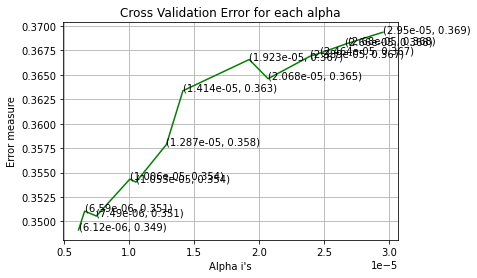

For values of best alpha =  6.12e-06 The train log loss is: 0.3218842540584513
For values of best alpha =  6.12e-06 The test log loss is: 0.34913503054706785
Total number of data points : 121287


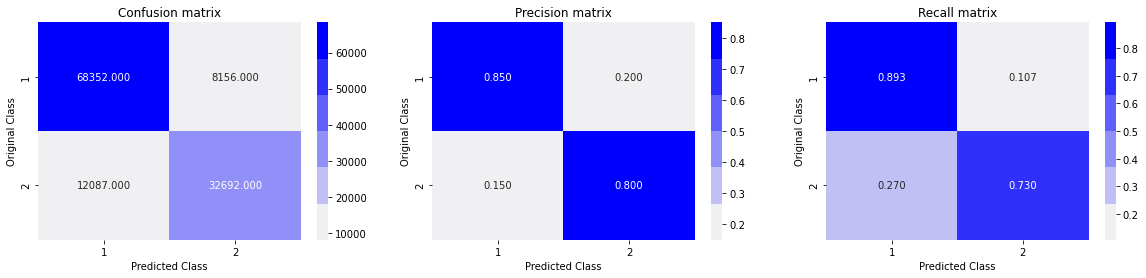

In [132]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------
alpha = np.random.uniform(0.000002,0.00003,14)
alpha = np.round(alpha,8)
alpha.sort()

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train2, y_train_tf)
    predict_y = sig_clf.predict_proba(X_test2)
    log_error_array.append(log_loss(y_test_tf, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tf, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train2, y_train_tf)

predict_y = sig_clf.predict_proba(X_train2)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tf, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test2)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tf, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tf, predicted_y)

#### Linear SVM with Hyperparameter tuning:

For values of alpha =  1e-05 The log loss is: 0.3500185069703198
For values of alpha =  0.0001 The log loss is: 0.3799014803050756
For values of alpha =  0.001 The log loss is: 0.40329173537501506
For values of alpha =  0.01 The log loss is: 0.41879373375583806
For values of alpha =  0.1 The log loss is: 0.46426941483021705
For values of alpha =  1 The log loss is: 0.5048823351275218
For values of alpha =  10 The log loss is: 0.5394130625989173


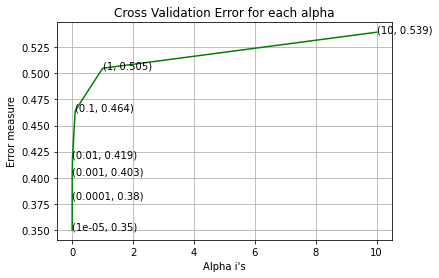

For values of best alpha =  1e-05 The train log loss is: 0.31420733318433564
For values of best alpha =  1e-05 The test log loss is: 0.3500185069703198
Total number of data points : 121287


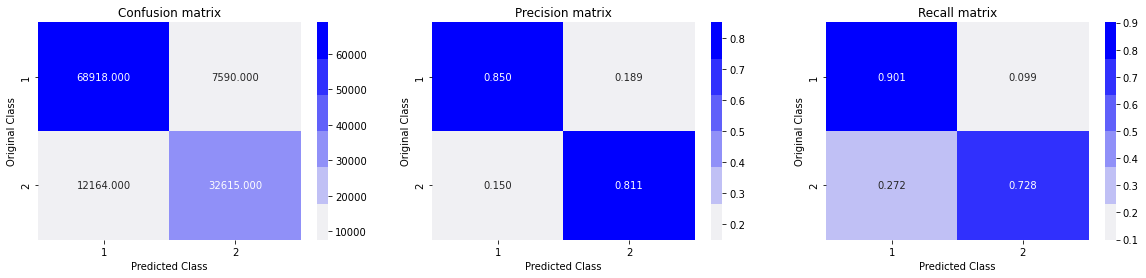

In [133]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train2, y_train_tf)
    predict_y = sig_clf.predict_proba(X_test2)
    log_error_array.append(log_loss(y_test_tf, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tf, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train2, y_train_tf)

predict_y = sig_clf.predict_proba(X_train2)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tf, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test2)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tf, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tf, predicted_y)

For values of alpha =  2.14e-06 The log loss is: 0.3508591990938044
For values of alpha =  3.12e-06 The log loss is: 0.3438122710564274
For values of alpha =  4.49e-06 The log loss is: 0.34250436463764566
For values of alpha =  1.066e-05 The log loss is: 0.3515739817567915
For values of alpha =  1.507e-05 The log loss is: 0.3505479404012968
For values of alpha =  1.581e-05 The log loss is: 0.35096679248886054
For values of alpha =  1.648e-05 The log loss is: 0.35241767424878767
For values of alpha =  1.735e-05 The log loss is: 0.35147938188258593
For values of alpha =  1.838e-05 The log loss is: 0.35336315395169376
For values of alpha =  1.85e-05 The log loss is: 0.3522697076715907
For values of alpha =  1.873e-05 The log loss is: 0.352677101330101
For values of alpha =  2.051e-05 The log loss is: 0.35542668399707605
For values of alpha =  2.352e-05 The log loss is: 0.35721589069488635
For values of alpha =  2.414e-05 The log loss is: 0.3568590868265078


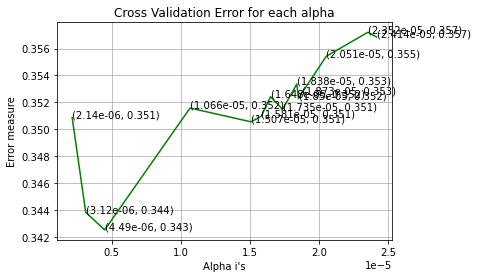

For values of best alpha =  4.49e-06 The train log loss is: 0.2879881783005747
For values of best alpha =  4.49e-06 The test log loss is: 0.34250436463764566
Total number of data points : 121287


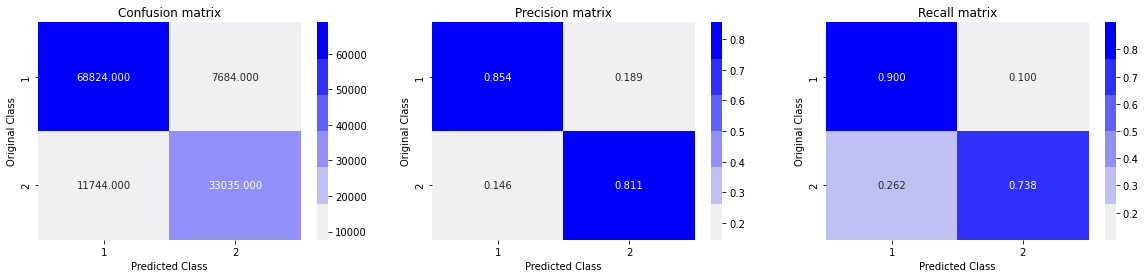

In [134]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------
alpha = np.random.uniform(0.000002,0.00003,14)
alpha = np.round(alpha,8)
alpha.sort()

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train2, y_train_tf)
    predict_y = sig_clf.predict_proba(X_test2)
    log_error_array.append(log_loss(y_test_tf, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tf, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train2, y_train_tf)

predict_y = sig_clf.predict_proba(X_train2)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tf, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test2)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tf, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tf, predicted_y)

#### With some others features:

In [10]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
import os
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [5]:
def remove_stop(sent):
    sent  = str(sent)
    if sent == None:
        return ' '
    if sent==np.nan:
        return ' '
    if sent == 'NaN':
        return ' '
    z = [i for i in sent.split() if i not in STOP_WORDS]
    return ' '.join(z)

In [21]:
dfnlp['question1'] = dfnlp.question1.apply(remove_stop)

In [22]:
dfnlp['question2'] = dfnlp.question2.apply(remove_stop)

In [23]:
# from collections.abc import Mapping

In [6]:
from gensim.models import Word2Vec
# from collection import Mapping
from gensim.models import KeyedVectors
import pickle
import gensim
import gensim.downloader

In [27]:
# dir(glove_vec)

In [8]:
# !wget http://nlp.stanford.edu/data/glove.840B.300d.zip

--2022-12-06 22:51:38--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2022-12-06 22:51:39--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2022-12-06 22:51:40--  https://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... ^C


In [3]:
# import pickle
# glove_file = open("glove.840B.300d.pkl", "rb")
# glove_model1 = pickle.load(glove_file)
# glove_file.close()

In [2]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec("glove.840B.300d.txt", word2vec_output_file="glove_vectors.txt")
#found error in library function script, hardcoded and reloaded the correct word2vec model which is g1 here

/tmp/ipykernel_29310/3045378817.py:2: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec("glove.840B.300d.txt", word2vec_output_file="glove_vectors.txt")


(2196018, 300)

In [7]:
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("g1.txt", binary=False)

In [6]:
glove_model

In [7]:
dir(KeyedVectors)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'fill_norms',
 'get_index',
 'get_mean_vector',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'init_sims',
 'intersect_word2vec_format',
 

In [12]:
# glove_model = glove_vec

In [2]:
del(glove_file)

In [8]:
type(glove_model)

gensim.models.keyedvectors.KeyedVectors

In [8]:
def wmd(s1, s2,model):
    s1 = str(s1)
    s2 = str(s2)
    s1 = s1.split()
    s2 = s2.split()
    return model.wmdistance(s1, s2)

http://proceedings.mlr.press/v37/kusnerb15.pdf i read about word mover distance and after that i calculated some distances from avg word vectors as below

In [11]:
dfnlp['Word_Mover_Dist'] = dfnlp.apply(lambda x: wmd(x['question1'], x['question2'],glove_model), axis=1)

In [12]:
# the avg-w2v for each sentence/review is stored in this list
def avg_w2v(list_of_sent,model,d):
    '''
    Returns average of word vectors for
    each sentance with dimension of model given
    '''
    sent_vectors = []
    for sent in list_of_sent: # for each review/sentence
        doc = [word for word in sent if word in model.wv.vocab]
        if doc:
            sent_vec = np.mean(model.wv[doc],axis=0)
        else:
            sent_vec = np.zeros(d)
        sent_vectors.append(sent_vec)
    return sent_vectors

In [13]:
'what' in dfnlp.question1.values

True

In [14]:
#converting into lists
list_of_question1=[]
for sent in dfnlp.question1.values:
    list_of_question1.append(str(sent).split())
list_of_question2=[]
for sent in dfnlp.question2.values:
    list_of_question2.append(str(sent).split())

In [15]:
list_of_question1[0:5]

[['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market',
  'in',
  'india'],
 ['what',
  'is',
  'the',
  'story',
  'of',
  'kohinoor',
  'koh',
  'i',
  'noor',
  'diamond'],
 ['how',
  'can',
  'i',
  'increase',
  'the',
  'speed',
  'of',
  'my',
  'internet',
  'connection',
  'while',
  'using',
  'a',
  'vpn'],
 ['why',
  'am',
  'i',
  'mentally',
  'very',
  'lonely',
  'how',
  'can',
  'i',
  'solve',
  'it'],
 ['which',
  'one',
  'dissolve',
  'in',
  'water',
  'quikly',
  'sugar',
  'salt',
  'methane',
  'and',
  'carbon',
  'di',
  'oxide']]

In [16]:
#avg word 2 vec
avgw2v_q1 = avg_w2v(list_of_question1,glove_model,300)
avgw2v_q2 = avg_w2v(list_of_question2,glove_model,300)

In [17]:
dir(glove_model)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 'accuracy',
 'add',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'get_keras_embedding',
 'get_vector',
 'index2entity',
 'index2word',
 'init_sims',
 'load',
 'load_word2vec_format',
 'log_accuracy',
 'log_evaluate_word_pairs',
 'most_similar',
 'most_similar_cosmul',
 'most_similar_to_given',
 'n_similarity',
 'rank',
 'relative_cosine_similarity',
 'save',
 'save_word2vec_for

In [ ]:
#converting as df
df_avgw2v = pd.DataFrame()
df_avgw2v['q1_vec'] = list(avgw2v_q1)
df_avgw2v['q2_vec'] = list(avgw2v_q2)
df_q1 = pd.DataFrame(df_avgw2v.q1_vec.values.tolist())
df_q2 = pd.DataFrame(df_avgw2v.q2_vec.values.tolist())

In [ ]:
#importing soma distances and calculating
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import cosine, cityblock,canberra, euclidean, minkowski
dfnlp['dist_cosine'] = [cosine(x, y) for (x, y) in zip(avgw2v_q1,avgw2v_q2)]
dfnlp['dist_cityblock'] = [cityblock(x, y) for (x, y) in zip(avgw2v_q1,avgw2v_q2)]
dfnlp['dist_canberra'] = [canberra(x, y) for (x, y) in zip(avgw2v_q1,avgw2v_q2)]
dfnlp['dist_euclidean'] = [euclidean(x, y) for (x, y) in zip(avgw2v_q1,avgw2v_q2)]
dfnlp['dist_minkowski'] = [minkowski(x, y) for (x, y) in zip(avgw2v_q1,avgw2v_q2)]

In [ ]:
#filling na values with 0  for cosine distance
dfnlp.dist_cosine = dfnlp.dist_cosine.fillna(0)

In [ ]:
#merzing all df
df_q1.reset_index(inplace=True)
df_q2.reset_index(inplace=True)
df_q1['index'] = df_q2['index']
df_avgw2v_final = df_q1.merge(df_q2, on='index',how='left')

In [ ]:
#for final df
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

In [ ]:
##merging all 
df1.id = df_avgw2v.index
df2.id = df_avgw2v.index
df_temp = df1.merge(df2,on='id',how='left')
df_final = df_temp.merge(df_avgw2v_final,left_on='id',right_on='index',how='left')

In [ ]:
#saving to disk
df_final.to_csv('df_final_avg.csv',index=False)

In [ ]:
df_final = pd.read_csv('df_final_avg.csv')

In [ ]:
## max no after inf is 13.45 so imputed infinity with 30
df_final.Word_Mover_Dist = df_final.Word_Mover_Dist.apply(lambda x: 30 if x == np.inf else x )

In [ ]:
#set of values
np.sort(list(set(df_final.Word_Mover_Dist.values)))

In [ ]:
n = df_final.shape[0]
sns.pairplot(df_final[['Word_Mover_Dist', 'dist_cosine', 'dist_cityblock', 
                       'dist_canberra','dist_euclidean', 'is_duplicate']][0:n], 
             hue='is_duplicate', vars=['Word_Mover_Dist', 'dist_cosine', 'dist_cityblock', 'dist_canberra','dist_euclidean'])
plt.show()

In [ ]:
##removing dependent varible
duplicate = df_final.is_duplicate
df_final = df_final.drop(['id','is_duplicate','index'],axis=1)

In [ ]:
 X_train,X_test, y_train, y_test = train_test_split(df_final,duplicate, stratify=duplicate, test_size=0.3,random_state=13)

In [ ]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

In [ ]:
scale_col = ['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 
             'first_word_eq', 'abs_len_diff', 'mean_len', 'token_set_ratio', 'token_sort_ratio',
             'fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio', 'Word_Mover_Dist',
             'dist_cosine', 'dist_cityblock', 'dist_canberra', 'dist_euclidean', 
             'dist_minkowski', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 
             'q2_n_words', 'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2']

In [ ]:
X_train_scale = X_train[scale_col]
X_test_scale = X_test[scale_col]

In [ ]:
X_train_w2v = X_train.drop(scale_col,axis=1)
X_test_w2v = X_test.drop(scale_col,axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train_scale)
X_test_sc = scale.transform(X_test_scale)
X_train_sc = pd.DataFrame(X_train_sc,columns=X_train_scale.columns)
X_test_sc = pd.DataFrame(X_test_sc,columns=X_test_scale.columns)

In [ ]:
## Final train and test vectors after scaling of normal features 
X_train_fi = pd.DataFrame(np.hstack((X_train_sc.values,X_train_w2v.values)),columns=df_final.columns)
X_test_fi = pd.DataFrame(np.hstack((X_test_sc.values,X_test_w2v.values)),columns=df_final.columns)

### Logistic Regression:

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_fi, y_train)
    predict_y = sig_clf.predict_proba(X_test_fi)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_fi, y_train)

predict_y = sig_clf.predict_proba(X_train_fi)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_fi)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------
alpha = np.random.uniform(0.0005,0.005,14)
alpha = np.round(alpha,6)
alpha.sort()
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_fi, y_train)
    predict_y = sig_clf.predict_proba(X_test_fi)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_fi, y_train)

predict_y = sig_clf.predict_proba(X_train_fi)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_fi)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### SVM:

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_fi, y_train)
    predict_y = sig_clf.predict_proba(X_test_fi)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_fi, y_train)

predict_y = sig_clf.predict_proba(X_train_fi)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_fi)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=i,n_jobs=-1)
    clf.fit(X_train_fi,y_train)
    predict_y = clf.predict_proba(X_train_fi)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test_fi)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
#plt.plot(estimators,train_scores,label='Train Log Loss')

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.12,n_estimators=600,
                        min_child_weight=5,
                        reg_alpha=150,reg_lambda=350,n_jobs=-1)
clf.fit(X_train_fi,y_train)
predict_y = clf.predict_proba(X_test_fi)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
np.array(X_train_fi.columns)[np.argsort(clf.feature_importances_)[::-1]][0:50]

Trained XGBoost on data dropping avg word vectors with below columns

In [ ]:
X_train_scale.columns

In [ ]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=i,n_jobs=-1)
    clf.fit(X_train_scale,y_train)
    predict_y = clf.predict_proba(X_train_scale)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test_scale)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators')
plt.ylabel('Log Loss')

In [ ]:
param_dist = {"max_depth": sp_randint(2,5),
              "learning_rate":uniform(0,0.25),
              "n_estimators":sp_randint(300,600),
              "min_child_weight": sp_randint(2, 8),
              "gamma": uniform(0,4),
              "subsample":uniform(0.7,0.3),
              "colsample_bytree": uniform(0.7,0.3),
              "reg_alpha":uniform(100,300),
              "reg_lambda":uniform(100,300)}

model_rs_xgb1 = RandomizedSearchCV(xgb.XGBClassifier(n_jobs=-1,random_state=25), param_distributions=param_dist,
                                   n_iter=30,scoring='neg_log_loss',cv=5,n_jobs=-1)
model_rs_xgb1.fit(X_train_scale,y_train)
pickle.dump(model_rs_xgb1,open('model_rs_xgb1.p','wb'))

In [ ]:
dict_scores = []
idx = 0
for i in model_rs_xgb1.grid_scores_:
    dict_score = []
    dict_score.append(i[0]['n_estimators'])
    dict_score.append(i[0]['max_depth'])
    dict_score.append(i[0]['subsample'])
    dict_score.append(i[0]['min_child_weight'])
    dict_score.append(i[0]['learning_rate'])
    dict_score.append(i[0]['reg_alpha'])
    dict_score.append(i[0]['reg_lambda'])
    dict_score.append(i[0]['gamma'])
    dict_score.append(i[0]['colsample_bytree'])
    dict_score.append(-i[1])
    dict_score.append((np.abs(i[2]).std()))
    dict_score.append(-model_rs_xgb1.cv_results_['mean_train_score'][idx])
    dict_scores.append(dict_score)
    idx = idx + 1
scores_df = pd.DataFrame(dict_scores,columns=['n_estimators','depth','subsample','min_child_weight',
                                               'learning_rate','reg_alpha','reg_lambda','gamma',
                                               'colsample_bytree','Test_score',
                                               'Test_std','Train_score'])

In [ ]:
scores_df.sort_values('Test_score').head()

in my view 2nd line (28) is beeter score than forst beacuse of train test scores and test standard deviation

In [ ]:
print('Best score params')
scores_df.loc[28]

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=4,learning_rate=0.131131,n_estimators=500,
                        min_child_weight=6,
                        reg_alpha=119.704012,reg_lambda=115.715236,
                        gamma=3.768808,colsample_bytree=0.911753,n_jobs=-1)
clf.fit(X_train_scale,y_train)
predict_y = clf.predict_proba(X_test_scale)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)